In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
warnings.filterwarnings ('ignore')
pd.set_option ('display.width', None)
pd.set_option ('display.max_rows', 100)
pd.set_option ('display.max_columns', 50)

`Các hàm chính trong thư viện json`

- json.dumps (obj, ...) --> Chuyển Python object thành JSON string

- json.loads (s, ...) --> Chuyển JSON string thành Python object

- json.dum (obj, file, ...) --> Ghi Python object thành file .json

- json.load (file, ...) --> Đọc file .json thành Python object

In [ ]:
with open ('UIT-VSFC-train.json', 'r', encoding='utf-8') as f:
    data = json.load (f)

data

[{'sentence': 'slide giáo trình đầy đủ .',
  'sentiment': 'positive',
  'topic': 'training_program'},
 {'sentence': 'nhiệt tình giảng dạy , gần gũi với sinh viên .',
  'sentiment': 'positive',
  'topic': 'lecturer'},
 {'sentence': 'đi học đầy đủ full điểm chuyên cần .',
  'sentiment': 'negative',
  'topic': 'training_program'},
 {'sentence': 'chưa áp dụng công nghệ thông tin và các thiết bị hỗ trợ cho việc giảng dạy .',
  'sentiment': 'negative',
  'topic': 'lecturer'},
 {'sentence': 'thầy giảng bài hay , có nhiều bài tập ví dụ ngay trên lớp .',
  'sentiment': 'positive',
  'topic': 'lecturer'},
 {'sentence': 'giảng viên đảm bảo thời gian lên lớp , tích cực trả lời câu hỏi của sinh viên , thường xuyên đặt câu hỏi cho sinh viên .',
  'sentiment': 'positive',
  'topic': 'lecturer'},
 {'sentence': 'em sẽ nợ môn này , nhưng em sẽ học lại ở các học kỳ kế tiếp .',
  'sentiment': 'neutral',
  'topic': 'others'},
 {'sentence': 'thời lượng học quá dài , không đảm bảo tiếp thu hiệu quả .',
  'se

In [4]:
df = pd.DataFrame (data)
df

,sentence,sentiment,topic
0,slide giáo trình đầy đủ .,positive,training_program
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",positive,lecturer
2,đi học đầy đủ full điểm chuyên cần .,negative,training_program
3,chưa áp dụng công nghệ thông tin và các thiết ...,negative,lecturer
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",positive,lecturer
...,...,...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...,negative,training_program
11422,em cảm ơn cô nhiều .,positive,lecturer
11423,giao bài tập quá nhiều .,negative,lecturer
11424,"giáo viên dạy dễ hiểu , nhiệt tình .",positive,lecturer


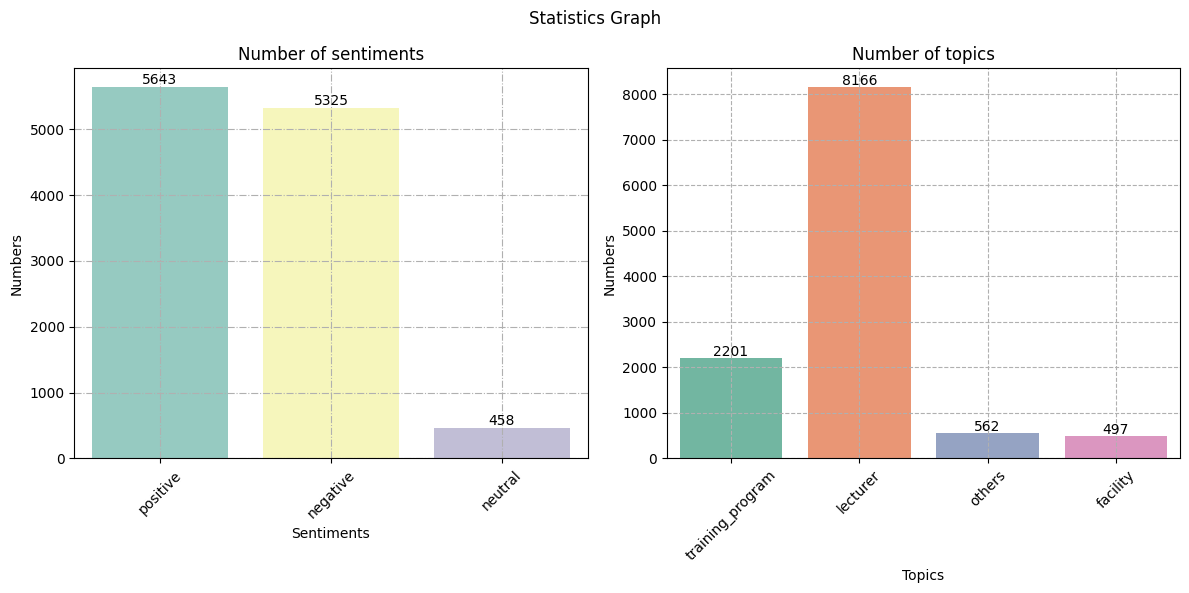

In [35]:
fig, ax = plt.subplots (1, 2, figsize=(12,6))
sns.countplot (x='sentiment', data=df, palette='Set3', ax=ax[0])
for p in ax[0].patches:
    height = p.get_height ()
    ax[0].text (
        p.get_x () + p.get_width ()/2,
        height + 50,
        int (height),
        ha = 'center'
    )
ax[0].tick_params (axis='x', rotation=45)
ax[0].set_xlabel ('Sentiments')
ax[0].set_ylabel ('Numbers')
ax[0].set_title ('Number of sentiments')
ax[0].grid (linestyle='-.')
    
sns.countplot (x='topic', data=df, color="#8D43A4", ax=ax[1], palette='Set2')
for p in ax[1].patches:
    height = p.get_height ()
    ax[1].text (
        p.get_x () + p.get_width ()/2,
        height + 50,
        int (height),
        ha='center'
    )
ax[1].tick_params (axis='x', rotation=45)
ax[1].set_xlabel ('Topics')
ax[1].set_ylabel ('Numbers')
ax[1].set_title ('Number of topics')
ax[1].grid (linestyle='dashed')

plt.suptitle ('Statistics Graph')    
plt.tight_layout ()
plt.show ()

# Bài 1: (2 điểm)

## Sử dụng bộ ngữ liệu UIT-VSFC với bài toán phân loại cảm xúc dựa trên phản hồi của sinh viên, thực hiện phân đoạn từ (Word Segmentation) bằng công cụ VnCoreNLP.

In [6]:
import py_vncorenlp
from py_vncorenlp import VnCoreNLP
# Khởi tạo VnCoreNLP client (chỉ chạy 1 lần)
py_vncorenlp.download_model(save_dir='/Users/kittnguyen/Downloads/vncorenlp')

model = py_vncorenlp.VnCoreNLP (save_dir='/Users/kittnguyen/Downloads/vncorenlp')

# model.annotate_file (input_file='/absolute/path/to/input/file', output_file='/absolute/path/to/output/file')
model.print_out (model.annotate_text ('Ông Nguyễn Văn A đang cười'))


VnCoreNLP model folder /Users/kittnguyen/Downloads/vncorenlp already exists! Please load VnCoreNLP from this folder!


ValueError: VM is already running, can't set classpath/options; VM started at  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 639, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 1985, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
    await self.process_one()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one
    await dispatch(*args)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
    await result
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
    await super().execute_request(stream, ident, parent)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
    reply_content = await reply_content
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
    res = shell.run_cell(
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell
    result = self._run_cell(
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell
    result = runner(coro)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    coro.send(None)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/yr/p848yj_55kqbdt12_mktq1gw0000gn/T/ipykernel_77734/3401835614.py", line 6, in <module>
    model = py_vncorenlp.VnCoreNLP (save_dir='/Users/kittnguyen/Downloads/vncorenlp')
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/py_vncorenlp/vncorenlp.py", line 53, in __init__
    from jnius import autoclass
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/jnius/__init__.py", line 45, in <module>
    from .reflect import *  # noqa
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/jnius/reflect.py", line 19, in <module>
    class Class(JavaClass, metaclass=MetaJavaClass):


In [12]:
from py_vncorenlp import VnCoreNLP

# Tránh khởi tạo lại nếu đã có JVM chạy
try:
    vncorenlp = VnCoreNLP(save_dir='vncorenlp', annotators=["wseg", "pos", "ner", "parse"])
except RuntimeError as e:
    print("JVM already started. You might need to restart the kernel if you want to reload the annotator.")


Exception: Please download the VnCoreNLP model!

In [10]:
sentence = "Tôi là sinh viên trường Đại học RMIT."
annotations = vncorenlp.annotate(sentence)

print(annotations)


NameError: name 'vncorenlp' is not defined